In [162]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers


print('This cell has completed!')

This cell has completed!


In [163]:
data_path = 'diabetes.txt'
df = pd.read_csv(data_path, sep=' ', header=None)
df = df.iloc[:,:9]
nan_count = max(df.isnull().sum())
print(f'There are most {nan_count} samples have missing value!')
df = df.dropna()
nan_count = max(df.isnull().sum())
print(f'After cleaned missing data, There are most {nan_count} samples have missing value!')
df.iloc[:,1:] = df.iloc[:,1:].applymap(lambda x: float(str(x)[2:]))
df.iloc[:,0] = df.iloc[:,0].map(lambda x: 0 if x == -1 else x)
df.reset_index(drop=True, inplace=True)
df

There are most 9 samples have missing value!
After cleaned missing data, There are most 0 samples have missing value!


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7220\3359791123.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1:] = df.iloc[:,1:].applymap(lambda x: float(str(x)[2:]))


,0,1,2,3,4,5,6,7,8
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
754,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
755,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
756,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
757,0,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [164]:
X_data = df.iloc[:, 1:].values
Y_data = df.iloc[:, 0].values

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.3)


X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.float32)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.float32)

Y_train = tf.reshape(Y_train, (-1, 1))  # Reshape to (531, 1)
Y_test = tf.reshape(Y_test, (-1, 1))    # Reshape to (531, 1)


print('This cell has completed!')

This cell has completed!


In [165]:
# For training data
unique, counts = np.unique(Y_train.numpy(), return_counts=True)
print("Training set class distribution:", dict(zip(unique, counts)))

# For test data
unique_test, counts_test = np.unique(Y_test.numpy(), return_counts=True)
weight_dic = {0: 1.5, 1: 1.}
print("Test set class distribution:", dict(zip(unique_test, counts_test)))
print('This cell has completed!')

Training set class distribution: {0.0: 181, 1.0: 350}
Test set class distribution: {0.0: 82, 1.0: 146}
This cell has completed!


In [166]:
# Initialize parameters using GlorotNormal for weights and zeros for biases
def initialize_parameters(n_x):
    initializer = tf.keras.initializers.GlorotNormal()  # GlorotNormal (Xavier) initializer
    W = tf.Variable(initializer([n_x, 1]), name="W")  # Initialize W using GlorotNormal
    b = tf.Variable(tf.zeros([1], dtype=tf.float32), name="b")  # Bias initialized as zeros
    return W, b

n_x = X_train.shape[1] 
W, b = initialize_parameters(n_x)

print('This cell has completed!')

This cell has completed!


In [167]:
# Forward propagation for one-layer binary classifier
def forward_propagation(X, W, b):
    Z = tf.add(tf.matmul(X, W), b)  # Z = W*X + b
    A = tf.sigmoid(Z)  # Sigmoid activation function
    return A

# Compute binary cross-entropy loss
def compute_loss(A, Y, class_weights_dict=weight_dic):
    loss = tf.keras.losses.binary_crossentropy(Y, A)
    sample_weights = tf.where(tf.equal(Y, 1), class_weights_dict[1], class_weights_dict[0])
    weighted_loss = loss * sample_weights
    return tf.reduce_mean(weighted_loss)  # We take the mean to get the final loss value

print('This cell has completed!')

This cell has completed!


In [168]:
# Train the model using gradient descent

def model(X_train, Y_train, X_test, Y_test, learning_rate=0.001, num_epochs=1500):
    # Initialize parameters
    W, b = initialize_parameters(X_train.shape[1])
    epochs = []
    losses = []

    # Define optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate)


    # Training loop
    for epoch in range(num_epochs+1):
        with tf.GradientTape() as tape:
            # Forward propagation
            A_train = forward_propagation(X_train, W, b)

            # Compute loss
            loss = compute_loss(A_train, Y_train)

        # Compute gradients
        gradients = tape.gradient(loss, [W, b])

        # Update parameters using optimizer
        optimizer.apply_gradients(zip(gradients, [W, b]))

        # Print cost every 1 ++00 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy()}")
            epochs.append(epoch)
            losses.append(loss)
    # After training, return the learned parameters
    return W, b, epochs, losses
print('This cell has completed!')

This cell has completed!


In [169]:
# Predict on test data
def predict(X, W, b):
    A = forward_propagation(X, W, b)
    return tf.cast(A > 0.5, tf.float32)  # Convert probabilities to binary class (0 or 1)

# Calculate accuracy
def compute_accuracy(predictions, labels):
    correct_predictions = tf.equal(predictions, labels)
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return accuracy.numpy()
print('This cell has completed!')

This cell has completed!


Epoch 0, Loss: 0.7348193526268005
Epoch 100, Loss: 0.6184015870094299
Epoch 200, Loss: 0.5870910882949829
Epoch 300, Loss: 0.5744417309761047
Epoch 400, Loss: 0.5684162378311157
Epoch 500, Loss: 0.5651970505714417
Epoch 600, Loss: 0.5634309649467468
Epoch 700, Loss: 0.5624920129776001
Epoch 800, Loss: 0.5620203018188477
Epoch 900, Loss: 0.5617985129356384
Epoch 1000, Loss: 0.5617011189460754
Epoch 1100, Loss: 0.5616614818572998
Epoch 1200, Loss: 0.5616464018821716
Epoch 1300, Loss: 0.5616412162780762
Epoch 1400, Loss: 0.5616396069526672
Epoch 1500, Loss: 0.561639130115509


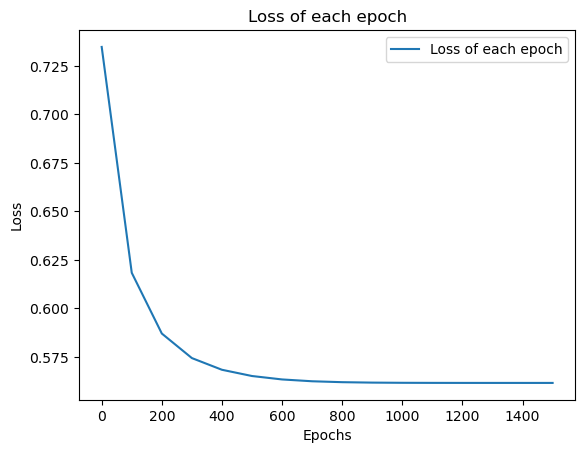

Train Accuracy: 0.7664783596992493
Test Accuracy: 0.8070175647735596
This cell has completed!


In [170]:
W, b, epoch, loss = model(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_epochs=1500)

predictions_train = predict(X_train, W, b)
predictions_test = predict(X_test, W, b)

plt.plot(epoch, loss, label='Loss of each epoch')
plt.title('Loss of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compute test accuracy
train_accuracy = compute_accuracy(predictions_train, Y_train)
test_accuracy = compute_accuracy(predictions_test, Y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print('This cell has completed!')

In [171]:
# New initialization function with additional layers
def initialize_parameters_mlp(n_x):
    initializer = tf.keras.initializers.GlorotNormal()

    # First hidden layer (input to hidden)
    W1 = tf.Variable(initializer([n_x, 64]), name="W1")  # 16 units in the first hidden layer
    b1 = tf.Variable(tf.zeros([64]), name="b1")

    # Second hidden layer
    W2 = tf.Variable(initializer([64, 32]), name="W2")  # 8 units in the second hidden layer
    b2 = tf.Variable(tf.zeros([32]), name="b2")

    # Output layer (hidden to output)
    W3 = tf.Variable(initializer([32, 1]), name="W3")   # Output layer with 1 unit
    b3 = tf.Variable(tf.zeros([1]), name="b3")

    return W1, b1, W2, b2, W3, b3
print('This cell has completed!')

This cell has completed!


In [172]:
# Forward propagation with two hidden layers (ReLU) and one output layer (Sigmoid)
def forward_propagation_mlp(X, W1, b1, W2, b2, W3, b3):
    Z1 = tf.add(tf.matmul(X, W1), b1)  # Z1 = W1 * X + b1
    A1 = tf.nn.relu(Z1)                # ReLU activation for first hidden layer

    Z2 = tf.add(tf.matmul(A1, W2), b2) # Z2 = W2 * A1 + b2
    A2 = tf.nn.relu(Z2)                # ReLU activation for second hidden layer

    Z3 = tf.add(tf.matmul(A2, W3), b3) # Z3 = W3 * A2 + b3
    A3 = tf.sigmoid(Z3)                # Sigmoid activation for binary classification
    return A3



def compute_loss(A, Y, W1,W2,W3,class_weights_dict = weight_dic,lambda_l2=0.01):
    A = tf.clip_by_value(A, 1e-7, 1 - 1e-7)  # To prevent log(0) issues
    loss = tf.keras.losses.binary_crossentropy(Y, A)
    sample_weights = tf.where(tf.equal(Y, 1), class_weights_dict[1], class_weights_dict[0])
    weighted_loss = loss * sample_weights
    l2_loss = lambda_l2 * (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3))
    return tf.reduce_mean(weighted_loss) +l2_loss

print('This cell has completed!')

This cell has completed!


In [173]:
def model_mlp(X_train, Y_train, X_test, Y_test, learning_rate=0.001, num_epochs=1500):
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = initialize_parameters_mlp(X_train.shape[1])

    # Define optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # Store losses
    train_losses = []
    test_losses = []
    losses = []
    epoches = []

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            # Forward propagation on training data
            A_train = forward_propagation_mlp(X_train, W1, b1, W2, b2, W3, b3)
            
            # Compute training loss
            train_loss = compute_loss(A_train, Y_train,W1=W1,W2=W2,W3=W3)
        
        # Compute gradients and update parameters
        gradients = tape.gradient(train_loss, [W1, b1, W2, b2, W3, b3])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

        # Compute test loss
        A_test = forward_propagation_mlp(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = compute_loss(A_test, Y_test,W1=W1,W2=W2,W3=W3)

        # Store losses
        train_losses.append(train_loss.numpy())
        test_losses.append(test_loss.numpy())

        # Print losses every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss.numpy()}, Test Loss = {test_loss.numpy()}")
            epoches.append(epoch)
            losses.append(train_loss.numpy())
    
    # Return parameters and losses for future analysis
    return W1, b1, W2, b2, W3, b3, train_losses, test_losses, epoches,losses
print('This cell has completed!')

This cell has completed!


In [174]:
# Predict on test data
def predict(X, W1, b1, W2, b2, W3, b3):
    A = forward_propagation_mlp(X, W1, b1, W2, b2, W3, b3)
    return tf.cast(A > 0.5, tf.float32)  # Convert probabilities to binary class (0 or 1)

# Calculate accuracy
def compute_accuracy(predictions, labels):
    correct_predictions = tf.equal(predictions, labels)
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return accuracy.numpy()
print('This cell has completed!')

This cell has completed!


Epoch 0: Train Loss = 1.0835621356964111, Test Loss = 1.0568149089813232
Epoch 100: Train Loss = 0.5917697548866272, Test Loss = 0.6005511283874512
Epoch 200: Train Loss = 0.5830105543136597, Test Loss = 0.6106585264205933
Epoch 300: Train Loss = 0.5810858607292175, Test Loss = 0.6159146428108215
Epoch 400: Train Loss = 0.5791624784469604, Test Loss = 0.6254817843437195
Epoch 500: Train Loss = 0.5784925222396851, Test Loss = 0.6277658939361572
Epoch 600: Train Loss = 0.5780661106109619, Test Loss = 0.6313266754150391
Epoch 700: Train Loss = 0.5778985023498535, Test Loss = 0.6335169076919556
Epoch 800: Train Loss = 0.5776838064193726, Test Loss = 0.6342253684997559
Epoch 900: Train Loss = 0.5775967836380005, Test Loss = 0.6350032091140747
Epoch 1000: Train Loss = 0.5775552988052368, Test Loss = 0.6354318857192993
Epoch 1100: Train Loss = 0.5775226354598999, Test Loss = 0.6358407735824585
Epoch 1200: Train Loss = 0.5775952935218811, Test Loss = 0.637420117855072
Epoch 1300: Train Loss = 

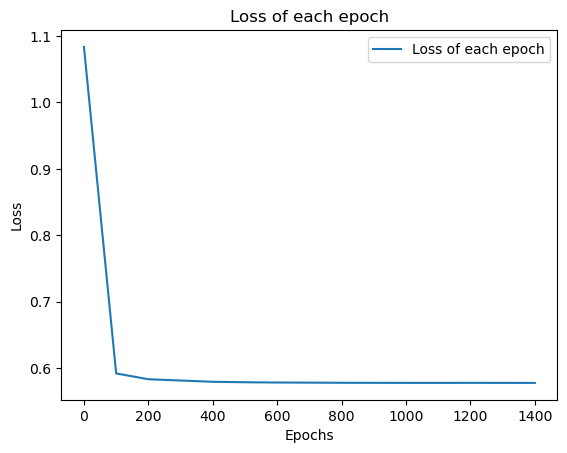

Train Accuracy: 0.8003766536712646
Test Accuracy: 0.7675438523292542
This cell has completed!


In [175]:
# Train the new MLP model
W1, b1, W2, b2, W3, b3, train_losses, test_losses, epoch,losses = model_mlp(
    X_train, Y_train, X_test, Y_test, learning_rate=0.005, num_epochs=1500
)

predictions_train = predict(X_train, W1, b1, W2, b2, W3, b3)
predictions_test = predict(X_test, W1, b1, W2, b2, W3, b3)

plt.plot(epoch, losses, label='Loss of each epoch')
plt.title('Loss of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Compute test accuracy
train_accuracy = compute_accuracy(predictions_train, Y_train)
test_accuracy = compute_accuracy(predictions_test, Y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print('This cell has completed!')

In [176]:
# Generate predictions on the test set
predictions = forward_propagation_mlp(X_test, W1, b1, W2, b2, W3, b3)

# Convert probabilities to binary predictions (threshold at 0.5)
binary_predictions = tf.where(predictions > 0.5, 1, 0)

# True labels in the test set
true_labels = Y_test.numpy()

# Convert predictions and labels to numpy arrays for easy manipulation
binary_predictions_np = binary_predictions.numpy()

# Identify incorrect predictions (where prediction != true label)
incorrect_predictions = binary_predictions_np != true_labels

# Separate incorrect predictions by class (0 and 1)
incorrect_class_0 = np.sum((true_labels == 0) & incorrect_predictions)
incorrect_class_1 = np.sum((true_labels == 1) & incorrect_predictions)

# Print the number of incorrect predictions for each class
print(f"Incorrect predictions for class 0: {incorrect_class_0}")
print(f"Incorrect predictions for class 1: {incorrect_class_1}")
print('This cell has completed!')

Incorrect predictions for class 0: 35
Incorrect predictions for class 1: 18
This cell has completed!


In [177]:
def build_model(input_shape, l2_lambda=0.01):
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=input_shape),  # Input layer (define input shape)
        
        # Hidden layers
        layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2_lambda)),         # First hidden layer with 64 neurons
        layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(l2_lambda)),         # Second hidden layer with 32 neurons
        layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(l2_lambda)),         # Third hidden layer with 16 neurons
        
        # Output layer
        layers.Dense(1, activation='sigmoid')        # Output layer for binary classification (1 neuron, sigmoid)
    ])
    return model

# Compile the model
def compile_model(model):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Adam optimizer with learning rate 0.001
                  loss='binary_crossentropy',                                # Binary cross-entropy loss
                  metrics=['accuracy'])                                      # Track accuracy

# Train the model
def train_model(model, X_train, Y_train, X_test, Y_test, class_weights=None, epochs=100, batch_size=32):
    history = model.fit(X_train, Y_train,
                        validation_data=(X_test, Y_test),
                        epochs=epochs,
                        batch_size=batch_size,
                        class_weight=class_weights)  # Optional: Pass class weights if needed
    return history

# Evaluate the model on the test set
def evaluate_model(model, X_test, Y_test):
    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
    return test_loss, test_accuracy
print('This cell has completed!')

This cell has completed!


In [178]:
# Define the input shape based on your dataset (e.g., number of features)
input_shape = X_train.shape[1:]

# Build, compile, and train the model
model = build_model(input_shape)
compile_model(model)
history = train_model(model, X_train, Y_train, X_test, Y_test, class_weights=weight_dic, epochs=150, batch_size=32)

# Evaluate the model
evaluate_model(model, X_test, Y_test)
print('This cell has completed!')

Epoch 1/150


D:\Tools\ANACONDA\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6840 - loss: 1.4229 - val_accuracy: 0.7675 - val_loss: 0.9352
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 1.0283 - val_accuracy: 0.7763 - val_loss: 0.7285
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.8271 - val_accuracy: 0.7807 - val_loss: 0.6252
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7226 - loss: 0.7776 - val_accuracy: 0.7895 - val_loss: 0.5781
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7902 - loss: 0.6925 - val_accuracy: 0.7719 - val_loss: 0.5985
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7446 - loss: 0.6946 - val_accuracy: 0.7675 - val_loss: 0.5466
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7695 - loss: 0.6864 - val_accuracy: 0.7500 - val_loss: 0.6001
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7328 - loss: 0.7189 - val_accuracy: 0.7544 - val_loss: 0.